In [450]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sklearn

## Load Data

In [451]:
df = pd.read_csv('cleaned_dataset.csv', delimiter='|')
df = df.drop(columns=['overall_price'])
df

,title,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
0,4-pokojowe mieszkanie 65m2 + ogródek Bezpośrednio,65.57,4.0,0.0,NaN,1,0,NaN,NaN,NaN,NaN,12504.19,0,1,1,zakole,stogi,gdansk,54.362472,18.709969
1,1 pokojowe + balkon INWESTYCYJNIe na DNI OTWARTE,26.01,1.0,2.0,primary,1,1,NaN,0.0,Mieszkanie,0.0,15840.98,1,0,0,NaN,śródmieście,gdansk,54.349020,18.651800
2,"Apartament inwestycyjny, ostatnie piętro, k/Sk...",24.89,1.0,5.0,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,16749.98,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
3,Apartament inwestycyjny Śląska 12 z umową najmu!,25.72,1.0,0.0,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,18500.00,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
4,"Nowe mieszkanie, wykończone - Mariana Kołodzieja",34.38,2.0,3.0,secondary,1,1,2022.0,1.0,Mieszkanie,0.0,15997.67,1,0,0,mariana kołodzieja,ujeścisko-łostowice,gdansk,54.334542,18.585750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14046,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 56.33 m2,56.33,3.0,2.0,primary,1,0,2024.0,1.0,Mieszkanie,1.0,10368.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14047,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 61.44 m2,61.44,3.0,3.0,primary,1,0,2024.0,1.0,Mieszkanie,1.0,10368.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14048,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 47.22 ...,47.00,2.0,1.0,primary,1,0,2025.0,1.0,Mieszkanie,1.0,10584.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14049,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 46.30 ...,46.30,2.0,1.0,primary,1,0,2025.0,1.0,Mieszkanie,1.0,10584.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438


In [452]:
df.dtypes

title                   object
area                   float64
number_of_rooms        float64
floor                  float64
type_of_market          object
parking                  int64
elevator                 int64
year_of_creation       float64
internet               float64
type_of_building        object
basement               float64
price_for_m2_in_PLN    float64
balcony                  int64
garden                   int64
terrace                  int64
street                  object
district                object
city                    object
latitude               float64
longtitude             float64
dtype: object

## Inspecting NaN values

In [453]:
# Calculating the number of NaN values for each column
nan_values = df.isnull().sum()
nan_values

title                     0
area                      1
number_of_rooms           0
floor                   489
type_of_market          603
parking                   0
elevator                  0
year_of_creation       1331
internet                603
type_of_building       1746
basement                603
price_for_m2_in_PLN       1
balcony                   0
garden                    0
terrace                   0
street                 1381
district                  0
city                      0
latitude                  0
longtitude                0
dtype: int64

In [454]:
# dropping the rows with NaN values in basement column
df = df.dropna(subset=['basement'])

In [455]:
# Calculating the number of NaN values for each column
nan_values = df.isnull().sum()
nan_values

title                     0
area                      1
number_of_rooms           0
floor                   489
type_of_market            0
parking                   0
elevator                  0
year_of_creation        728
internet                  0
type_of_building       1143
basement                  0
price_for_m2_in_PLN       1
balcony                   0
garden                    0
terrace                   0
street                 1381
district                  0
city                      0
latitude                  0
longtitude                0
dtype: int64

### Categorizing type_of_building column

In [456]:
df['type_of_building'].value_counts()

type_of_building
Mieszkanie          11883
Dom bliźniak          111
Dom wolnostojący      111
Dom szeregowy         105
wolnostojący           68
szeregowiec            19
Dom rekreacyjny         6
Dom kamienica           1
Dom piętro domu         1
Name: count, dtype: int64

In [457]:
df[df['type_of_building'].isnull()]

,title,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
7,2 pokoje | nowe budownictwo,42.70,2.0,1.0,secondary,1,0,2015.0,0.0,NaN,1.0,15456.67,1,0,0,NaN,grabówek,gdynia,54.517680,18.538920
42,Nietuzinkowe blisko morza na Wyspie Sobieszews...,43.13,2.0,0.0,secondary,1,0,2021.0,0.0,NaN,0.0,24345.00,0,1,1,turystyczna,wyspa sobieszewska,gdansk,54.344034,18.827022
46,2 pokojowe mieszkanie dostępne od zaraz!,37.00,2.0,1.0,secondary,1,0,2022.0,0.0,NaN,0.0,13918.92,1,0,0,franciszka sokoła,chwarzno-wiczlino,gdynia,54.490386,18.423491
50,Nowa oferta mieszkań - Meva - Gdynia Grabówek M2,56.12,3.0,0.0,primary,1,0,2024.0,1.0,NaN,0.0,13096.94,0,1,0,gerarda denhoffa 2,grabówek,gdynia,54.523362,18.516540
61,Nowe mieszkanie Scala w Centrum Gdańska,59.57,3.0,1.0,secondary,0,1,2023.0,0.0,NaN,0.0,24005.37,1,0,0,NaN,śródmieście,gdansk,54.349020,18.651800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6953,Sprzedane!,52.63,2.0,4.0,secondary,1,0,1980.0,0.0,NaN,1.0,13072.39,1,0,0,falista,grabówek,gdynia,54.521610,18.519251
6954,"Po remoncie, widok na starą Halę Targową",63.00,3.0,2.0,secondary,0,0,NaN,0.0,NaN,1.0,14920.63,1,0,0,podwale staromiejskie,śródmieście,gdansk,54.353372,18.653097
6962,Granaria - Wyspa Spichrzów,68.19,1.0,1.0,secondary,0,1,2020.0,0.0,NaN,0.0,22500.00,0,0,0,chmielna,śródmieście,gdansk,54.346105,18.656253
6963,Granaria - Wyspa Spichrzów,47.15,1.0,1.0,secondary,0,1,2020.0,0.0,NaN,0.0,22500.00,0,0,0,chmielna,śródmieście,gdansk,54.346105,18.656253


In [458]:
# If the title contains word mieszkanie and type_of_building is null then type_of_building = Mieszkanie
df.loc[df['title'].str.contains('mieszkanie', case=False) & df['type_of_building'].isnull(), 'type_of_building'] = 'Mieszkanie'
df.loc[df['title'].str.contains('mieszkań', case=False) & df['type_of_building'].isnull(), 'type_of_building'] = 'Mieszkanie'
df.loc[df['title'].str.contains('dom', case=False) & df['type_of_building'].isnull(), 'type_of_building'] = 'Dom'
df.loc[df['title'].str.contains('apartament', case=False) & df['type_of_building'].isnull(), 'type_of_building'] = 'Mieszkanie'

In [459]:
df[df['type_of_building'].isnull()]

,title,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
7,2 pokoje | nowe budownictwo,42.70,2.0,1.0,secondary,1,0,2015.0,0.0,NaN,1.0,15456.67,1,0,0,NaN,grabówek,gdynia,54.517680,18.538920
42,Nietuzinkowe blisko morza na Wyspie Sobieszews...,43.13,2.0,0.0,secondary,1,0,2021.0,0.0,NaN,0.0,24345.00,0,1,1,turystyczna,wyspa sobieszewska,gdansk,54.344034,18.827022
70,3pokoje.W.Otulinie.Parku.Gdynia.MałyKack.Taras,73.58,3.0,1.0,primary,1,0,2024.0,0.0,NaN,0.0,19135.00,1,0,0,wzgórze bernadowo,mały kack,gdynia,54.468501,18.513716
101,Quercus - B2.127,39.00,2.0,5.0,primary,0,1,2025.0,0.0,NaN,0.0,11818.59,0,0,0,wielkopolska,ujeścisko-łostowice,gdansk,54.319110,18.591801
102,Quercus - B2.74,44.00,2.0,1.0,primary,0,1,2025.0,0.0,NaN,0.0,10756.48,0,0,0,wielkopolska,ujeścisko-łostowice,gdansk,54.319110,18.591801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6953,Sprzedane!,52.63,2.0,4.0,secondary,1,0,1980.0,0.0,NaN,1.0,13072.39,1,0,0,falista,grabówek,gdynia,54.521610,18.519251
6954,"Po remoncie, widok na starą Halę Targową",63.00,3.0,2.0,secondary,0,0,NaN,0.0,NaN,1.0,14920.63,1,0,0,podwale staromiejskie,śródmieście,gdansk,54.353372,18.653097
6962,Granaria - Wyspa Spichrzów,68.19,1.0,1.0,secondary,0,1,2020.0,0.0,NaN,0.0,22500.00,0,0,0,chmielna,śródmieście,gdansk,54.346105,18.656253
6963,Granaria - Wyspa Spichrzów,47.15,1.0,1.0,secondary,0,1,2020.0,0.0,NaN,0.0,22500.00,0,0,0,chmielna,śródmieście,gdansk,54.346105,18.656253


In [460]:
df = df.dropna(subset=['type_of_building'])

In [461]:
df['type_of_building'].value_counts()

type_of_building
Mieszkanie          12411
Dom bliźniak          111
Dom wolnostojący      111
Dom szeregowy         105
wolnostojący           68
szeregowiec            19
Dom rekreacyjny         6
Dom                     4
Dom kamienica           1
Dom piętro domu         1
Name: count, dtype: int64

In [462]:
# If the type_of_building column is mieszkanie leave it else = dom
df['type_of_building'] = np.where(df['type_of_building'] == 'Mieszkanie', 'Mieszkanie', 'Dom')

In [463]:
df['type_of_building'].value_counts()

type_of_building
Mieszkanie    12411
Dom             426
Name: count, dtype: int64

In [464]:
df

,title,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
1,1 pokojowe + balkon INWESTYCYJNIe na DNI OTWARTE,26.01,1.0,2.0,primary,1,1,NaN,0.0,Mieszkanie,0.0,15840.98,1,0,0,NaN,śródmieście,gdansk,54.349020,18.651800
2,"Apartament inwestycyjny, ostatnie piętro, k/Sk...",24.89,1.0,5.0,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,16749.98,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
3,Apartament inwestycyjny Śląska 12 z umową najmu!,25.72,1.0,0.0,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,18500.00,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
4,"Nowe mieszkanie, wykończone - Mariana Kołodzieja",34.38,2.0,3.0,secondary,1,1,2022.0,1.0,Mieszkanie,0.0,15997.67,1,0,0,mariana kołodzieja,ujeścisko-łostowice,gdansk,54.334542,18.585750
5,"Wyjątkowe mieszkanie w centrum Gdyni, blisko l...",101.58,4.0,5.0,secondary,0,1,1997.0,1.0,Mieszkanie,0.0,11468.79,0,0,0,janusza korczaka,redłowo,gdynia,54.494118,18.543134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14046,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 56.33 m2,56.33,3.0,2.0,primary,1,0,2024.0,1.0,Mieszkanie,1.0,10368.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14047,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 61.44 m2,61.44,3.0,3.0,primary,1,0,2024.0,1.0,Mieszkanie,1.0,10368.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14048,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 47.22 ...,47.00,2.0,1.0,primary,1,0,2025.0,1.0,Mieszkanie,1.0,10584.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14049,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 46.30 ...,46.30,2.0,1.0,primary,1,0,2025.0,1.0,Mieszkanie,1.0,10584.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438


In [465]:
# Calculating the number of NaN values for each column
nan_values = df.isnull().sum()
nan_values

title                     0
area                      1
number_of_rooms           0
floor                   472
type_of_market            0
parking                   0
elevator                  0
year_of_creation        624
internet                  0
type_of_building          0
basement                  0
price_for_m2_in_PLN       1
balcony                   0
garden                    0
terrace                   0
street                 1267
district                  0
city                      0
latitude                  0
longtitude                0
dtype: int64

In [466]:
# Inspection of the rows with NaN values in the year_of_creation column
df[df['year_of_creation'].isnull()]

,title,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
1,1 pokojowe + balkon INWESTYCYJNIe na DNI OTWARTE,26.01,1.0,2.0,primary,1,1,NaN,0.0,Mieszkanie,0.0,15840.98,1,0,0,NaN,śródmieście,gdansk,54.349020,18.651800
6,"Mieszkanie w centrum, 500 m. od ""Starego Miasta""",51.81,3.0,3.0,secondary,0,1,NaN,1.0,Mieszkanie,0.0,13317.89,1,0,0,NaN,śródmieście,gdansk,54.349020,18.651800
20,lokal INWESTYCYJNIE >25m2 cenaBrutto ODLICZ VA...,28.67,1.0,1.0,primary,1,1,NaN,0.0,Mieszkanie,0.0,15313.95,1,0,0,NaN,śródmieście,gdansk,54.349020,18.651800
21,3 pokoje / blisko SKM / Oliwa,56.20,3.0,2.0,secondary,1,1,NaN,0.0,Mieszkanie,1.0,12437.72,1,0,0,al. grunwaldzka,oliwa,gdansk,54.392494,18.583594
28,"Mieszkanie 5 pokojowe, Wrzeszcz ul. Politechni...",82.00,5.0,2.0,secondary,0,0,NaN,1.0,Mieszkanie,1.0,9634.15,1,0,0,politechniczna 16a,wrzeszcz górny,gdansk,54.373953,18.616613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6875,Apartament nad morzem Gdynia | Orłowo | 136 m²,136.24,4.0,1.0,primary,1,1,NaN,1.0,Dom,0.0,19744.57,1,0,0,NaN,chylonia,gdynia,54.545488,18.464193
6878,"Przestronne 4-pokojowe mieszkanie, Osiedle HOR...",74.12,4.0,6.0,primary,1,1,NaN,1.0,Mieszkanie,1.0,10700.22,1,0,1,starowiejska 65,letnica,gdansk,54.394466,18.647388
6886,Mieszkanie z potencjałem przy samym lesie,44.50,2.0,0.0,secondary,0,0,NaN,0.0,Mieszkanie,1.0,9415.73,1,0,0,swarzewska,chylonia,gdynia,54.537917,18.463613
6930,"Orlovo Park Nowa Inwestycja w Gdyni, Orłowo",87.47,3.0,0.0,primary,1,1,NaN,1.0,Mieszkanie,0.0,22750.66,0,1,1,NaN,orłowo,gdynia,54.476907,18.548787


In [467]:
# Droping the rows with NaN values in the year_of_creation column
df = df.dropna(subset=['year_of_creation'])

In [468]:
# Calculating the number of NaN values for each column
nan_values = df.isnull().sum()
nan_values

title                    0
area                     1
number_of_rooms          0
floor                  452
type_of_market           0
parking                  0
elevator                 0
year_of_creation         0
internet                 0
type_of_building         0
basement                 0
price_for_m2_in_PLN      1
balcony                  0
garden                   0
terrace                  0
street                 999
district                 0
city                     0
latitude                 0
longtitude               0
dtype: int64

In [469]:
# Dropping the rows with NaN values in area column
df = df.dropna(subset=['area'])

In [470]:
# Calculating the number of NaN values for each column
nan_values = df.isnull().sum()
nan_values

title                    0
area                     0
number_of_rooms          0
floor                  452
type_of_market           0
parking                  0
elevator                 0
year_of_creation         0
internet                 0
type_of_building         0
basement                 0
price_for_m2_in_PLN      0
balcony                  0
garden                   0
terrace                  0
street                 999
district                 0
city                     0
latitude                 0
longtitude               0
dtype: int64

In [471]:
# Inspecting the rows with floor column == None
df[df['floor'].isnull()]

,title,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
304,nowe mieszkanie/lokal użytkowy 66m2 gdynia orłowo,66.01,3.0,NaN,secondary,1,1,2022.0,1.0,Mieszkanie,0.0,17724.59,0,1,1,wrocławska,orłowo,gdynia,54.475629,18.552093
440,5A - Nodo - Gdańsk Jasień,92.48,4.0,NaN,primary,1,0,2025.0,0.0,Dom,0.0,8531.57,0,1,0,lubowidzka,jasień,gdansk,54.340089,18.560014
478,NEGOCJUJ-IdealnyApartamentBezpośrednioOdDewelo...,87.39,4.0,NaN,primary,1,1,2024.0,1.0,Mieszkanie,1.0,13300.00,1,0,1,NaN,letnica,gdansk,54.337888,18.671963
482,NEGOCJUJ-IdealnyApartamentBezpośrednioOdDewelo...,87.39,4.0,NaN,primary,1,1,2024.0,1.0,Mieszkanie,1.0,13300.00,1,0,1,NaN,letnica,gdansk,54.337888,18.671963
686,"Wiśniowa Aleja -nowe osiedle, 3 pokoje z ogrodem!",69.63,3.0,NaN,primary,1,1,2024.0,1.0,Mieszkanie,0.0,10771.22,0,1,0,czereśniowa,ujeścisko-łostowice,gdansk,54.319110,18.591801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14021,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 61.20 ...,61.00,3.0,NaN,primary,1,0,2024.0,1.0,Mieszkanie,1.0,1015.00,0,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14034,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 61.93 ...,61.93,3.0,NaN,primary,1,0,2024.0,1.0,Mieszkanie,1.0,10260.00,0,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14036,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 42.62 ...,42.60,2.0,NaN,primary,1,0,2025.0,1.0,Mieszkanie,1.0,10800.00,0,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14038,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 44.66 ...,44.66,2.0,NaN,primary,1,0,2025.0,1.0,Mieszkanie,1.0,10908.00,0,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438


In [472]:
# if the floor is null and type_of_building is Dom then floor = 0
df.loc[df['type_of_building'] == 'Dom', 'floor'] = 0

In [473]:
df[df['floor'].isnull()]

,title,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
304,nowe mieszkanie/lokal użytkowy 66m2 gdynia orłowo,66.01,3.0,NaN,secondary,1,1,2022.0,1.0,Mieszkanie,0.0,17724.59,0,1,1,wrocławska,orłowo,gdynia,54.475629,18.552093
478,NEGOCJUJ-IdealnyApartamentBezpośrednioOdDewelo...,87.39,4.0,NaN,primary,1,1,2024.0,1.0,Mieszkanie,1.0,13300.00,1,0,1,NaN,letnica,gdansk,54.337888,18.671963
482,NEGOCJUJ-IdealnyApartamentBezpośrednioOdDewelo...,87.39,4.0,NaN,primary,1,1,2024.0,1.0,Mieszkanie,1.0,13300.00,1,0,1,NaN,letnica,gdansk,54.337888,18.671963
686,"Wiśniowa Aleja -nowe osiedle, 3 pokoje z ogrodem!",69.63,3.0,NaN,primary,1,1,2024.0,1.0,Mieszkanie,0.0,10771.22,0,1,0,czereśniowa,ujeścisko-łostowice,gdansk,54.319110,18.591801
851,Kawalerka/Jasień/ Blisko Śródmieścia,30.00,1.0,NaN,secondary,1,1,2024.0,1.0,Mieszkanie,0.0,12300.00,0,0,1,czereśniowa,ujeścisko-łostowice,gdansk,54.319110,18.591801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14021,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 61.20 ...,61.00,3.0,NaN,primary,1,0,2024.0,1.0,Mieszkanie,1.0,1015.00,0,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14034,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 61.93 ...,61.93,3.0,NaN,primary,1,0,2024.0,1.0,Mieszkanie,1.0,10260.00,0,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14036,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 42.62 ...,42.60,2.0,NaN,primary,1,0,2025.0,1.0,Mieszkanie,1.0,10800.00,0,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14038,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 44.66 ...,44.66,2.0,NaN,primary,1,0,2025.0,1.0,Mieszkanie,1.0,10908.00,0,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438


In [474]:
df.dropna(subset=['floor'], inplace=True)

In [475]:
df.isna().sum()

title                    0
area                     0
number_of_rooms          0
floor                    0
type_of_market           0
parking                  0
elevator                 0
year_of_creation         0
internet                 0
type_of_building         0
basement                 0
price_for_m2_in_PLN      0
balcony                  0
garden                   0
terrace                  0
street                 984
district                 0
city                     0
latitude                 0
longtitude               0
dtype: int64

In [476]:
df

,title,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
2,"Apartament inwestycyjny, ostatnie piętro, k/Sk...",24.89,1.0,5.0,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,16749.98,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
3,Apartament inwestycyjny Śląska 12 z umową najmu!,25.72,1.0,0.0,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,18500.00,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
4,"Nowe mieszkanie, wykończone - Mariana Kołodzieja",34.38,2.0,3.0,secondary,1,1,2022.0,1.0,Mieszkanie,0.0,15997.67,1,0,0,mariana kołodzieja,ujeścisko-łostowice,gdansk,54.334542,18.585750
5,"Wyjątkowe mieszkanie w centrum Gdyni, blisko l...",101.58,4.0,5.0,secondary,0,1,1997.0,1.0,Mieszkanie,0.0,11468.79,0,0,0,janusza korczaka,redłowo,gdynia,54.494118,18.543134
10,Mieszkanie w świetnej lokalizacji Gdynia Dąbrowa,68.00,3.0,1.0,secondary,0,0,2000.0,1.0,Mieszkanie,1.0,10279.41,1,0,0,oliwkowa,dąbrowa,gdynia,54.471180,18.470508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14046,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 56.33 m2,56.33,3.0,2.0,primary,1,0,2024.0,1.0,Mieszkanie,1.0,10368.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14047,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 61.44 m2,61.44,3.0,3.0,primary,1,0,2024.0,1.0,Mieszkanie,1.0,10368.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14048,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 47.22 ...,47.00,2.0,1.0,primary,1,0,2025.0,1.0,Mieszkanie,1.0,10584.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14049,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 46.30 ...,46.30,2.0,1.0,primary,1,0,2025.0,1.0,Mieszkanie,1.0,10584.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438


### Categorizing the floor column

In [477]:
df['floor'].value_counts()

floor
1.0    2906
0.0    2616
2.0    2167
3.0    1966
4.0    1257
5.0     464
6.0     221
7.0     207
8.0     176
9.0      99
Name: count, dtype: int64

In [478]:
# Histogram of the floor column

<Axes: >

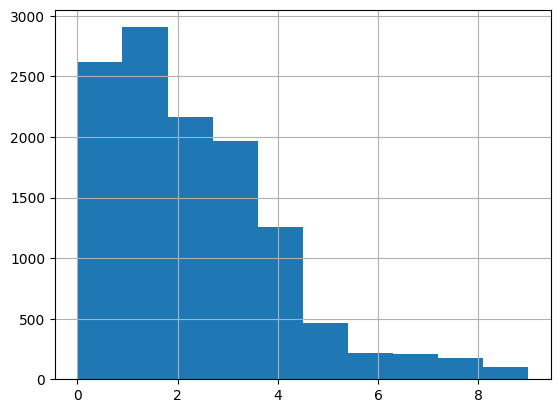

In [479]:
df['floor'].hist()

In [480]:
# Categorizing into 4 categories: 0, 1-3, 4-7, 8+
df['floor'] = pd.cut(df['floor'], bins=[-1, 0, 3, 6, np.inf], labels=['0', '1-3', '4-6', '8+'])

In [481]:
df['floor'].value_counts()

floor
1-3    7039
0      2616
4-6    1942
8+      482
Name: count, dtype: int64

In [482]:
df

,title,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
2,"Apartament inwestycyjny, ostatnie piętro, k/Sk...",24.89,1.0,4-6,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,16749.98,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
3,Apartament inwestycyjny Śląska 12 z umową najmu!,25.72,1.0,0,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,18500.00,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
4,"Nowe mieszkanie, wykończone - Mariana Kołodzieja",34.38,2.0,1-3,secondary,1,1,2022.0,1.0,Mieszkanie,0.0,15997.67,1,0,0,mariana kołodzieja,ujeścisko-łostowice,gdansk,54.334542,18.585750
5,"Wyjątkowe mieszkanie w centrum Gdyni, blisko l...",101.58,4.0,4-6,secondary,0,1,1997.0,1.0,Mieszkanie,0.0,11468.79,0,0,0,janusza korczaka,redłowo,gdynia,54.494118,18.543134
10,Mieszkanie w świetnej lokalizacji Gdynia Dąbrowa,68.00,3.0,1-3,secondary,0,0,2000.0,1.0,Mieszkanie,1.0,10279.41,1,0,0,oliwkowa,dąbrowa,gdynia,54.471180,18.470508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14046,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 56.33 m2,56.33,3.0,1-3,primary,1,0,2024.0,1.0,Mieszkanie,1.0,10368.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14047,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 61.44 m2,61.44,3.0,1-3,primary,1,0,2024.0,1.0,Mieszkanie,1.0,10368.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14048,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 47.22 ...,47.00,2.0,1-3,primary,1,0,2025.0,1.0,Mieszkanie,1.0,10584.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14049,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 46.30 ...,46.30,2.0,1-3,primary,1,0,2025.0,1.0,Mieszkanie,1.0,10584.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438


In [483]:
# Saving the cleaned data to a csv file
df.to_csv('cleaned_dataset_without_na.csv', sep='|', index=False)